## Cálculo de carga para cada nodo (+/-)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df_prod = pd.read_csv('dataset/mean_production.csv') #el dataset de producción de sustdata 
df_ref = pd.read_csv('dataset/new_pvwatts_hourly.csv') #el dataset de producción de global
df_cons = pd.read_csv('dataset/nodes/consum/consum_1.csv') #es el único que está bien, con datos y con columna h
out = 'dataset/nodes/loads/load_1.csv'
df_cons.head()

,Pavg,iid,datetime,h
0,88.245095,1,2010-11-28,0.0
1,97.032063,1,2010-11-28,1.0
2,265.475255,1,2010-11-28,2.0
3,133.492523,1,2010-11-28,3.0
4,46.772055,1,2010-11-28,4.0


In [36]:
df_prod = df_prod.drop('iid', axis=1) #se elimina iid de dataset de producción
df_prod.head()

,solar,datetime,h
0,0.0,2010-07-01,0.0
1,0.0,2010-07-01,1.0
2,0.0,2010-07-01,2.0
3,0.0,2010-07-01,3.0
4,0.0,2010-07-01,4.0


In [37]:
df_ref.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00


## Tratamiento df consumo

In [38]:
#hay que rellenar las filas sin hora  
df_cons['h'] = pd.to_numeric(df_cons['h'], errors='coerce')
#df_cons['h'] = df_cons['h'].where(df_cons['h'].shift(1) == 23.0, df_cons['h'].fillna(df_cons['h'].shift(1) + 1).fillna(0))

#hay que rellenar las filas con datos nan
#df_cons['Pavg'] = df_cons['Pavg'].fillna((df_cons['Pavg'].shift(1) + df_cons['Pavg'].shift(2) + df_cons['Pavg'].shift(3))/3)


#esto no funciona ->
""" for i, row in df_cons.iterrows():
    if pd.isna(row['h']):
        row['h'] = df_cons['h'].shift(1) + 1 """
        
#esto rellena la primera bien y las demás igual que la primera      
""" df_cons['h'] = df_cons['h'].fillna(method='ffill') + 1
df_cons['h'] = df_cons['h'].apply(lambda x: x % 24) """


#solución temporal -> relleno -1
#df_cons['h'] = df_cons['h'].fillna(-1) #ESTO CUIDADO QUE TIMESTAMP LO ASOCIA COMO 23:00


" df_cons['h'] = df_cons['h'].fillna(method='ffill') + 1\ndf_cons['h'] = df_cons['h'].apply(lambda x: x % 24) "

In [39]:
#comprobación de nan
subset = df_cons[df_cons['datetime'] == '2011-09-04']
subset

,Pavg,iid,datetime,h
6720,1132.853407,1,2011-09-04,0.0
6721,936.154763,1,2011-09-04,1.0
6722,475.055650,1,2011-09-04,2.0
6723,580.334983,1,2011-09-04,3.0
6724,2203.706700,1,2011-09-04,4.0
6725,2998.150000,1,2011-09-04,5.0
6726,NaN,1,2011-09-04,NaN
6727,NaN,1,2011-09-04,NaN
6728,NaN,1,2011-09-04,NaN
6729,NaN,1,2011-09-04,NaN


In [40]:
#se añade columna timestamp
df_cons['timestamp'] = pd.to_datetime(df_cons['datetime']) + pd.to_timedelta(df_cons['h'], unit='h')
df_cons.head()

,Pavg,iid,datetime,h,timestamp
0,88.245095,1,2010-11-28,0.0,2010-11-28 00:00:00
1,97.032063,1,2010-11-28,1.0,2010-11-28 01:00:00
2,265.475255,1,2010-11-28,2.0,2010-11-28 02:00:00
3,133.492523,1,2010-11-28,3.0,2010-11-28 03:00:00
4,46.772055,1,2010-11-28,4.0,2010-11-28 04:00:00


In [41]:
#SOLUCIÓN ACTUAL -> QUITAR TODOS LOS NAN
df_cons = df_cons.dropna() 

In [ ]:
df_cons["h"] = df_cons["h"].astype(int)

## Comparación de los datos de producción (Sustdata) con los de referencia (personalizados)

In [42]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_prod["datetime"], df_prod["solar"], linestyle="-")
plt.title(f"Power Production SUSTDATA (MWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (MWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 100 != 0:
        label.set_visible(False)  """

' plt.figure(figsize=(10, 6))\nplt.plot(df_prod["datetime"], df_prod["solar"], linestyle="-")\nplt.title(f"Power Production SUSTDATA (MWh)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (MWh)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 100 != 0:\n        label.set_visible(False)  '

In [43]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_ref["timestamp"], df_ref["DC Array Output (W)"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 200 != 0:
        label.set_visible(False)  """

' plt.figure(figsize=(10, 6))\nplt.plot(df_ref["timestamp"], df_ref["DC Array Output (W)"], linestyle="-")\nplt.title(f"Power Production of one node GLOBAL DATA (W)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 200 != 0:\n        label.set_visible(False)  '

In [44]:
mean_all = df_prod['solar'].mean()*1e6
mean_one = df_ref['DC Array Output (W)'].mean()

print("de todos (W): " + str(mean_all) +  ", de uno (W): " + str(mean_one))
print("nº nodos media: " + str(mean_all/mean_one))

de todos (W): 1683398.6877477563, de uno (W): 530.4314433789954
nº nodos media: 3173.640455822226


## Cálculo final de producción y diferencia por nodo 

### SUSTDATA

In [45]:
df_merged1 = pd.merge(df_prod, df_cons, on=['datetime', 'h'], how='inner')
df_merged1.head() #antes de añadir cálculo dif

,solar,datetime,h,Pavg,iid,timestamp
0,0.0,2010-11-28,0.0,88.245095,1,2010-11-28 00:00:00
1,0.0,2010-11-28,1.0,97.032063,1,2010-11-28 01:00:00
2,0.0,2010-11-28,2.0,265.475255,1,2010-11-28 02:00:00
3,0.0,2010-11-28,3.0,133.492523,1,2010-11-28 03:00:00
4,0.0,2010-11-28,4.0,46.772055,1,2010-11-28 04:00:00


In [46]:
df_merged1['dif'] = (df_merged1['solar']*1000/10) - df_merged1['Pavg']  
df_merged1.head() #después de añadir cálculo dif

,solar,datetime,h,Pavg,iid,timestamp,dif
0,0.0,2010-11-28,0.0,88.245095,1,2010-11-28 00:00:00,-88.245095
1,0.0,2010-11-28,1.0,97.032063,1,2010-11-28 01:00:00,-97.032063
2,0.0,2010-11-28,2.0,265.475255,1,2010-11-28 02:00:00,-265.475255
3,0.0,2010-11-28,3.0,133.492523,1,2010-11-28 03:00:00,-133.492523
4,0.0,2010-11-28,4.0,46.772055,1,2010-11-28 04:00:00,-46.772055


In [47]:
""" max_solar = df_merged1[df_merged1['dif'] < -3000]
max_solar.head() """

" max_solar = df_merged1[df_merged1['dif'] < -3000]\nmax_solar.head() "

### GLOBAL DATA

In [48]:
df_ref['timestamp'] = pd.to_datetime(df_ref['timestamp'])
df_merged2 = pd.merge(df_ref, df_cons, on=['timestamp'], how='inner')
df_merged2.head() #antes de añadir cálculo dif

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h
0,11,28,0,0,0,12.8,1.8,0.2,0.0,12.8,0.0,0.0,2010-11-28 00:00:00,88.245095,1,2010-11-28,0.0
1,11,28,1,0,0,12.5,1.2,0.2,0.0,12.5,0.0,0.0,2010-11-28 01:00:00,97.032063,1,2010-11-28,1.0
2,11,28,2,0,0,12.2,1.2,0.2,0.0,12.2,0.0,0.0,2010-11-28 02:00:00,265.475255,1,2010-11-28,2.0
3,11,28,3,0,0,11.9,0.4,0.2,0.0,11.9,0.0,0.0,2010-11-28 03:00:00,133.492523,1,2010-11-28,3.0
4,11,28,4,0,0,11.6,0.2,0.2,0.0,11.6,0.0,0.0,2010-11-28 04:00:00,46.772055,1,2010-11-28,4.0


In [49]:
df_merged2['dif'] = (df_merged2['DC Array Output (W)']) - df_merged2['Pavg']  
df_merged2.head() #después de añadir cálculo dif

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h,dif
0,11,28,0,0,0,12.8,1.8,0.2,0.0,12.8,0.0,0.0,2010-11-28 00:00:00,88.245095,1,2010-11-28,0.0,-88.245095
1,11,28,1,0,0,12.5,1.2,0.2,0.0,12.5,0.0,0.0,2010-11-28 01:00:00,97.032063,1,2010-11-28,1.0,-97.032063
2,11,28,2,0,0,12.2,1.2,0.2,0.0,12.2,0.0,0.0,2010-11-28 02:00:00,265.475255,1,2010-11-28,2.0,-265.475255
3,11,28,3,0,0,11.9,0.4,0.2,0.0,11.9,0.0,0.0,2010-11-28 03:00:00,133.492523,1,2010-11-28,3.0,-133.492523
4,11,28,4,0,0,11.6,0.2,0.2,0.0,11.6,0.0,0.0,2010-11-28 04:00:00,46.772055,1,2010-11-28,4.0,-46.772055


In [50]:
columns_to_drop = ['Month', 'Day', 'Hour', 'Wind Speed (m/s)', 'Albedo', 'AC System Output (W)'] #limpieza de dataset
df_merged2.drop(columns=columns_to_drop, inplace=True)
df_merged2.head()

,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),timestamp,Pavg,iid,datetime,h,dif
0,0,0,12.8,0.0,12.8,0.0,2010-11-28 00:00:00,88.245095,1,2010-11-28,0.0,-88.245095
1,0,0,12.5,0.0,12.5,0.0,2010-11-28 01:00:00,97.032063,1,2010-11-28,1.0,-97.032063
2,0,0,12.2,0.0,12.2,0.0,2010-11-28 02:00:00,265.475255,1,2010-11-28,2.0,-265.475255
3,0,0,11.9,0.0,11.9,0.0,2010-11-28 03:00:00,133.492523,1,2010-11-28,3.0,-133.492523
4,0,0,11.6,0.0,11.6,0.0,2010-11-28 04:00:00,46.772055,1,2010-11-28,4.0,-46.772055


In [51]:
column_order = list(df_merged2.columns) #reorden de columnas
column_order = ['timestamp'] + ['datetime'] + ['h'] + [col for col in column_order if col not in ['timestamp', 'datetime', 'h']]
df_merged2 = df_merged2[column_order]
df_merged2.head()

,timestamp,datetime,h,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),Pavg,iid,dif
0,2010-11-28 00:00:00,2010-11-28,0.0,0,0,12.8,0.0,12.8,0.0,88.245095,1,-88.245095
1,2010-11-28 01:00:00,2010-11-28,1.0,0,0,12.5,0.0,12.5,0.0,97.032063,1,-97.032063
2,2010-11-28 02:00:00,2010-11-28,2.0,0,0,12.2,0.0,12.2,0.0,265.475255,1,-265.475255
3,2010-11-28 03:00:00,2010-11-28,3.0,0,0,11.9,0.0,11.9,0.0,133.492523,1,-133.492523
4,2010-11-28 04:00:00,2010-11-28,4.0,0,0,11.6,0.0,11.6,0.0,46.772055,1,-46.772055


In [52]:
df_merged2_subset = df_merged2[df_merged2['datetime'] < '2011-11-28'] #un año de datos
df_merged2_subset.count()

timestamp                           8395
datetime                            8395
h                                   8395
Beam Irradiance (W/m2)              8395
Diffuse Irradiance (W/m2)           8395
Ambient Temperature (C)             8395
Plane of Array Irradiance (W/m2)    8395
Cell Temperature (C)                8395
DC Array Output (W)                 8395
Pavg                                8395
iid                                 8395
dif                                 8395
dtype: int64

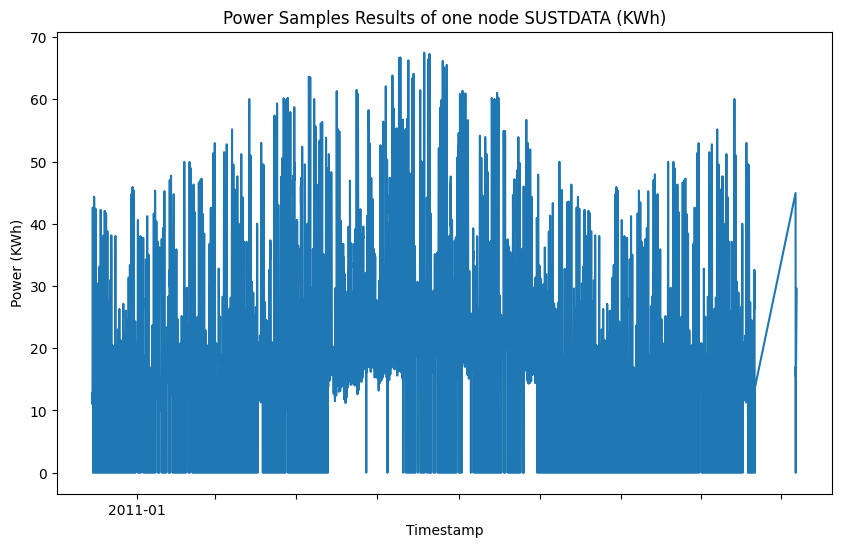

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["Cell Temperature (C)"], linestyle="-")
plt.title(f"Power Samples Results of one node SUSTDATA (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (KWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 10 != 0:
        label.set_visible(False) 

#### COMPARACIÓN RESULTADOS PARA NODO

In [54]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_merged1["timestamp"], df_merged1["dif"], linestyle="-")
plt.title(f"Power Samples Results of one node SUSTDATA (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (KWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 20 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_merged1["timestamp"], df_merged1["dif"], linestyle="-")\nplt.title(f"Power Samples Results of one node SUSTDATA (KWh)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (KWh)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 20 != 0:\n        label.set_visible(False) '

In [55]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["dif_original"], linestyle="-")
plt.title(f"Power Samples Results of one node GLOBAL (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 30 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_merged2["timestamp"], df_merged2["dif_original"], linestyle="-")\nplt.title(f"Power Samples Results of one node GLOBAL (W)")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 30 != 0:\n        label.set_visible(False) '

## APLICACIÓN DE RUIDO

In [56]:
""" import numpy as np
noise = np.random.normal(loc=0, scale=100, size=len(df_ref)) #creación de ruido
mask = df_ref['DC Array Output (W)'] == 0
noise[mask] = 0  #para los valores 0 no se aplica ruido

noise = np.abs(noise) #para que no salgan valores negativos
data_plus_noise = df_ref['DC Array Output (W)'] + noise

df_merged2['Prod_final'] = data_plus_noise #se añade columna a merged
df_ref['Prod_final'] = data_plus_noise #se añade columna al dataset de global

print(df_ref[['Prod_final', 'DC Array Output (W)']].head(20)) """

" import numpy as np\nnoise = np.random.normal(loc=0, scale=100, size=len(df_ref)) #creación de ruido\nmask = df_ref['DC Array Output (W)'] == 0\nnoise[mask] = 0  #para los valores 0 no se aplica ruido\n\nnoise = np.abs(noise) #para que no salgan valores negativos\ndata_plus_noise = df_ref['DC Array Output (W)'] + noise\n\ndf_merged2['Prod_final'] = data_plus_noise #se añade columna a merged\ndf_ref['Prod_final'] = data_plus_noise #se añade columna al dataset de global\n\nprint(df_ref[['Prod_final', 'DC Array Output (W)']].head(20)) "

#### CÁLCULO NUEVA COLUMNA DIFERENCIA -> CARGAS FINALES YA CON RUIDO APLICADO

In [57]:
""" df_merged2['dif_final'] = (df_merged2['Prod_final']) - df_merged2['Pavg']  #cálculo de nueva diferencia -> carga final a utilizar
df_merged2.head(20) """

" df_merged2['dif_final'] = (df_merged2['Prod_final']) - df_merged2['Pavg']  #cálculo de nueva diferencia -> carga final a utilizar\ndf_merged2.head(20) "

In [58]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_ref["timestamp"], df_ref["Prod_final"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W) + NOISE")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 200 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_ref["timestamp"], df_ref["Prod_final"], linestyle="-")\nplt.title(f"Power Production of one node GLOBAL DATA (W) + NOISE")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 200 != 0:\n        label.set_visible(False) '

In [59]:
""" plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["dif_final"], linestyle="-")
plt.title(f"Power Samples Results of one node GLOBAL (W) + NOISE")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 30 != 0:
        label.set_visible(False) """

' plt.figure(figsize=(10, 6))\nplt.plot(df_merged2["timestamp"], df_merged2["dif_final"], linestyle="-")\nplt.title(f"Power Samples Results of one node GLOBAL (W) + NOISE")\nplt.xlabel("Timestamp")\nplt.ylabel("Power (W)")\nfor n, label in enumerate(plt.gca().xaxis.get_ticklabels()):\n    if n % 30 != 0:\n        label.set_visible(False) '

## CREACIÓN .CSV

In [60]:
#df_merged2.to_csv(out, index=False)